# 11th Session

# The Solow Growth Model part 3

# The Accurate Approach

In [51]:
import numpy as np
import matplotlib.pyplot as plt

**Intensive production function:**

$$ f(k) = k^{\alpha}$$

$$ y = k^\alpha$$
**Total output (𝑌) is the product of the number of workers (𝐿) and output per worker (𝑦).**

$$Y = L \cdot y = L \cdot k^\alpha$$

**K/Y ratio:**

$$K/Y = \frac{K}{L \cdot k^\alpha} = \frac{k}{k^\alpha} = k^{1 - \alpha}$$

**This ratio is important for analyzing the steady-state behavior of the economy**

**Dynamics of k**

$\dot k = sk^\alpha - (n + g + \delta)k$

**Derivative of $k^{1 - \alpha}$ with respect to time** 

$\frac{d}{dt}k^{1 - \alpha} = (1 - \alpha) k^{-\alpha} \dot{k}$

**Subtituting $\dot k = sk^\alpha - (n + g + \delta)k$**

$\dot{k}^{1 - \alpha} = (1 - \alpha) k^{-\alpha} [sk^{\alpha} - (n + g + \delta)k]$

$\dot{k}^{1 - \alpha} = (1 - \alpha)s - (1 - \alpha)(n + g + \delta)k^{1-\alpha}$

$\dot{k}^{1 - \alpha} + (1 - \alpha)(n + g + \delta)k^{1-\alpha} = (1 - \alpha)s$

**Multiplying Integrating factor $e^{(1 - \alpha)(n + g + \delta)t}$, to both sides**

$(\dot{k}^{1 - \alpha} + (1 - \alpha)(n + g + \delta)k^{1-\alpha}) e^{(1 - \alpha)(n + g + \delta)t} = (1 - \alpha)s e^{(1 - \alpha)(n + g + \delta)t}$

**Integrating**

$\int (\dot{k}^{1 - \alpha} + (1 - \alpha)(n + g + \delta)k^{1-\alpha}) e^{(1 - \alpha)(n + g + \delta)t} dt = \int (1 - \alpha)s e^{(1 - \alpha)(n + g + \delta)t} dt$

**The result:**

$k^{1-\alpha} e^{(1 - \alpha)(n + g + \delta)t} = \frac{s}{n + g + \delta}e^{(1 - \alpha)(n + g + \delta)t} + C$

**Finding C**

$k(t)^{1-\alpha} = \frac{s}{n + g + \delta} + C e^{-(1 - \alpha)(n + g + \delta)t}$

$t = 0 \rightarrow (k(0)^{1-\alpha} = \frac{s}{n + g + \delta} + C$

$C = k(0)^{1-\alpha} - \frac{s}{n + g + \delta}$

**Substituting C in the integration result**

$k(t)^{1-\alpha} = \frac{s}{n + g + \delta} + (k(0)^{1-\alpha} - \frac{s}{n + g + \delta}) e^{-(1 - \alpha)(n + g + \delta)t}$

**dynamic solution for capital per effective labor k(t):**

$k(t) = \left[\frac{s}{n + g + \delta} + k(0)^{1-\alpha} - \frac{s}{n + g + \delta}) e^{-(1 - \alpha)(n + g + \delta)t}\right]^{\frac{1}{1-\alpha}}$

**This equation provides the value of capital at each time step based on the initial condition and the model parameters.**

## A Temporary Increase In Saving Rates

### Initial State:

In [52]:
# Parameters
s = 0.3  # Saving rate
d = 0.1  # Depreciation rate
n = 0.02  # Population growth rate
g = 0.03  # Growth rate of technology
alpha = 0.3  # Output elasticity of capital

#Time Periods
time_periods = 100
t = np.arange(time_periods)

#capital, output, investment
k = np.zeros(time_periods)
k[0] = 0.43 #initial capital per effective labor

y = np.zeros(time_periods)
sfk = np.zeros(time_periods)
K_Y_ratio = np.zeros(time_periods)
sfk = np.zeros(time_periods)

sfk[0] = s * y[0]

for i in range(time_periods):
    k[i] = ((s / (n + g + d)) + (k[0] ** (1 - alpha) - s / (n + g + d)) * np.exp(-(1 - alpha) * (n + g + d) * t[i])) ** (1 / (1 - alpha))
    y[i] = k[i] ** alpha
    sfk[i] = s * y[i]



In [53]:
k_star = ((s) / (n + g + d)) ** (1 / (1 - alpha))
y_star = (k_star ** alpha)
i_star = s * y_star
c_star = y_star - i_star
d_star = (n + g + d) * k_star

print(f'k*: {k_star} \ny*: {y_star} \ni*: {i_star} \nd*: {d_star} \nc*: {c_star}')

k*: 2.6918003852647114 
y*: 1.345900192632356 
i*: 0.40377005778970676 
d*: 0.40377005778970676 
c*: 0.9421301348426492


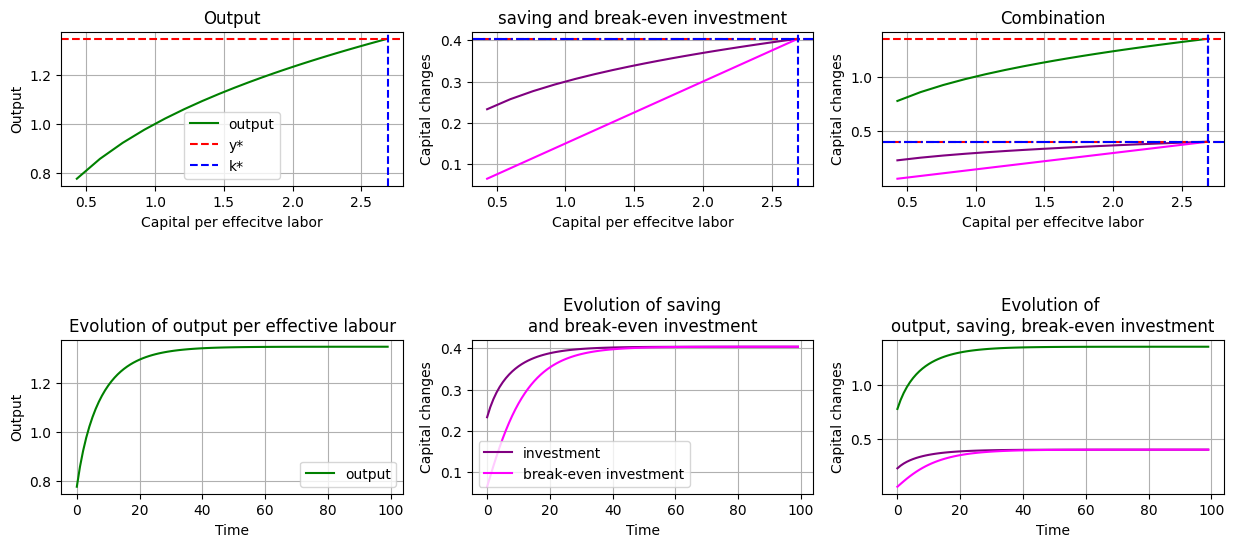

In [54]:
fig = plt.figure(figsize = (15, 6))

ax1 = fig.add_subplot(2, 3, 1)
plt.plot(k, y, color = "green", label = "output")
plt.axhline(y = y_star, color = 'r', linestyle = '--', label = 'y*')
plt.axvline(x = k_star, color = 'b', linestyle = '--', label = 'k*')
plt.title("Output")
plt.xlabel("Capital per effecitve labor")
plt.ylabel("Output")
plt.legend()
plt.grid()

ax2 = fig.add_subplot(2, 3, 2)
plt.plot(k, sfk, color = "purple", label = "investment")
plt.plot(k, (n + g + d) * k, color = "magenta", label = "break-even investment")
plt.axhline(y = i_star, color = 'r', linestyle = '--', label = 'y*')
plt.axhline(y = d_star, color = 'b', linestyle = '-.', label = 'y*')
plt.axvline(x = k_star, color = 'b', linestyle = '--', label = 'k*')
plt.title("saving and break-even investment")
plt.xlabel("Capital per effecitve labor")
plt.ylabel("Capital changes")
#plt.legend(loc = 3)
plt.grid()

ax3 = fig.add_subplot(2, 3, 3)
plt.plot(k, y, color = "green", label = "output")
plt.plot(k, sfk, color = "purple", label = "investment")
plt.plot(k, (n + g + d) * k, color = "magenta", label = "break-even investment")
plt.axhline(y = y_star, color = 'r', linestyle = '--', label = 'y*')
plt.axvline(x = k_star, color = 'b', linestyle = '--', label = 'k*')
plt.axhline(y = i_star, color = 'r', linestyle = '--', label = 'y*')
plt.axhline(y = d_star, color = 'b', linestyle = '-.', label = 'y*')
plt.axvline(x = k_star, color = 'b', linestyle = '--', label = 'k*')
plt.title("Combination")
plt.xlabel("Capital per effecitve labor")
plt.ylabel("Capital changes")
#plt.legend(loc = 3)
plt.grid()

ax4 = fig.add_subplot(2, 3, 4)
plt.plot(t, y, color = "green", label = "output")
plt.title('Evolution of output per effective labour')
plt.xlabel("Time")
plt.ylabel("Output")
plt.legend()
plt.grid()

ax5 = fig.add_subplot(2, 3, 5)
plt.plot(t, sfk, color = "purple", label = "investment")
plt.plot(t, (n + g + d) * k, color = "magenta", label = "break-even investment")
plt.title('Evolution of saving\nand break-even investment')
plt.xlabel("Time")
plt.ylabel("Capital changes")
plt.legend(loc = 3)
plt.grid()

ax6 = fig.add_subplot(2, 3, 6)
plt.plot(t, y, color = "green", label = "output")
plt.plot(t, sfk, color = "purple", label = "investment")
plt.plot(t, (n + g + d) * k, color = "magenta", label = "break-even investment")
plt.title('Evolution of \noutput, saving, break-even investment')
plt.xlabel("Time")
plt.ylabel("Capital changes")
#plt.legend(loc = 3)
plt.grid()

plt.subplots_adjust(hspace=1) 
plt.show()

## In the 10th period, the saving rate will increase from 0.3 to 0.4 temporarily

In [55]:
#parameters
s = 0.3 #saving rate
d = 0.1 #depreciation rate
n = 0.02 #population growth
g = 0.03 #grwoth rate of technology
alpha = 0.3

#Time Periods
time_periods = 100
t = np.arange(time_periods)

#capital, output, investment
k = np.zeros(time_periods)
k[0] = 0.43 #initial capital per effective labor

y = np.zeros(time_periods)
sfk = np.zeros(time_periods)

#saving rates over time
vector_of_s = np.zeros(time_periods)
vector_of_s[0:] = s
s_new = 0.4
period_of_shock = 10
vector_of_s[period_of_shock] = s_new

for i in range(time_periods):
    k[i] = ((s / (n + g + d)) + (k[0] ** (1 - alpha) - s / (n + g + d)) * np.exp(-(1 - alpha) * (n + g + d) * t[i])) ** (1 / (1 - alpha))
    y[i] = k[i] ** alpha
    sfk[i] = vector_of_s[i] * y[i]


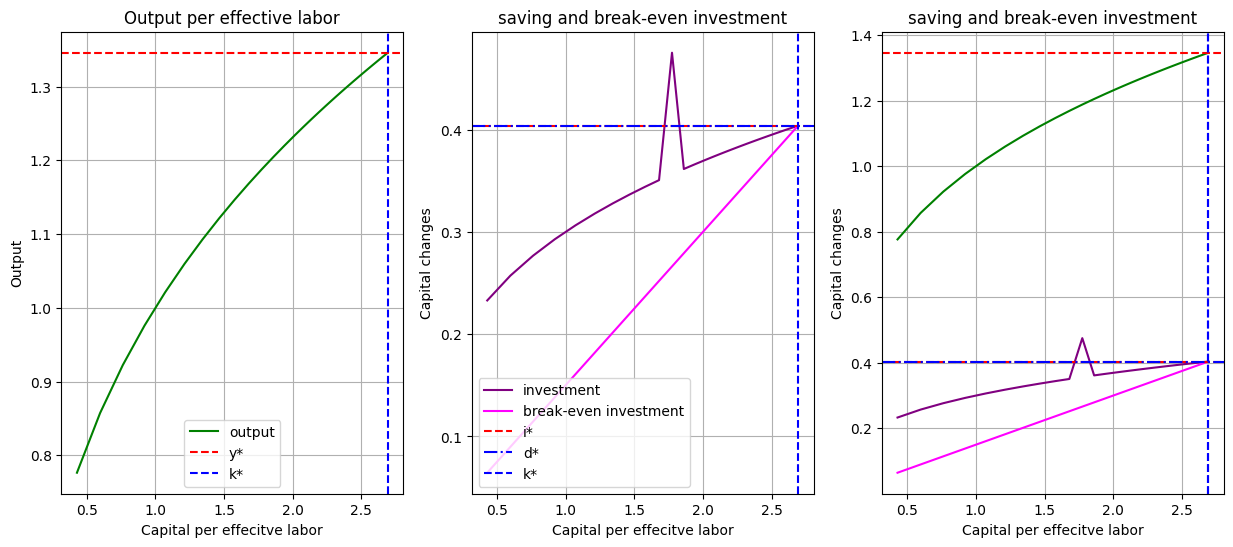

In [56]:
fig = plt.figure(figsize = (15, 6))

ax1 = fig.add_subplot(1, 3, 1)
plt.plot(k, y, color = "green", label = "output")
plt.axhline(y = y_star, color = 'r', linestyle = '--', label = 'y*')
plt.axvline(x = k_star, color = 'b', linestyle = '--', label = 'k*')
plt.title("Output per effective labor")
plt.xlabel("Capital per effecitve labor")
plt.ylabel("Output")
plt.legend()
plt.grid()

ax2 = fig.add_subplot(1, 3, 2)
plt.plot(k, sfk, color = "purple", label = "investment")
plt.plot(k, (n + g + d) * k, color = "magenta", label = "break-even investment")
plt.axhline(y = i_star, color = 'r', linestyle = '--', label = 'i*')
plt.axhline(y = d_star, color = 'b', linestyle = '-.', label = 'd*')
plt.axvline(x = k_star, color = 'b', linestyle = '--', label = 'k*')
plt.title("saving and break-even investment")
plt.xlabel("Capital per effecitve labor")
plt.ylabel("Capital changes")
plt.legend(loc = 3)
plt.grid()

ax3 = fig.add_subplot(1, 3, 3)
plt.plot(k, y, color = "green", label = "output")
plt.plot(k, sfk, color = "purple", label = "investment")
plt.plot(k, (n + g + d) * k, color = "magenta", label = "break-even investment")
plt.axhline(y = y_star, color = 'r', linestyle = '--', label = 'y*')
plt.axvline(x = k_star, color = 'b', linestyle = '--', label = 'k*')
plt.axhline(y = i_star, color = 'r', linestyle = '--', label = 'i*')
plt.axhline(y = d_star, color = 'b', linestyle = '-.', label = 'd*')
plt.axvline(x = k_star, color = 'b', linestyle = '--', label = 'k*')
plt.title("saving and break-even investment")
plt.xlabel("Capital per effecitve labor")
plt.ylabel("Capital changes")
#plt.legend(loc = 3)
plt.grid()


plt.show()

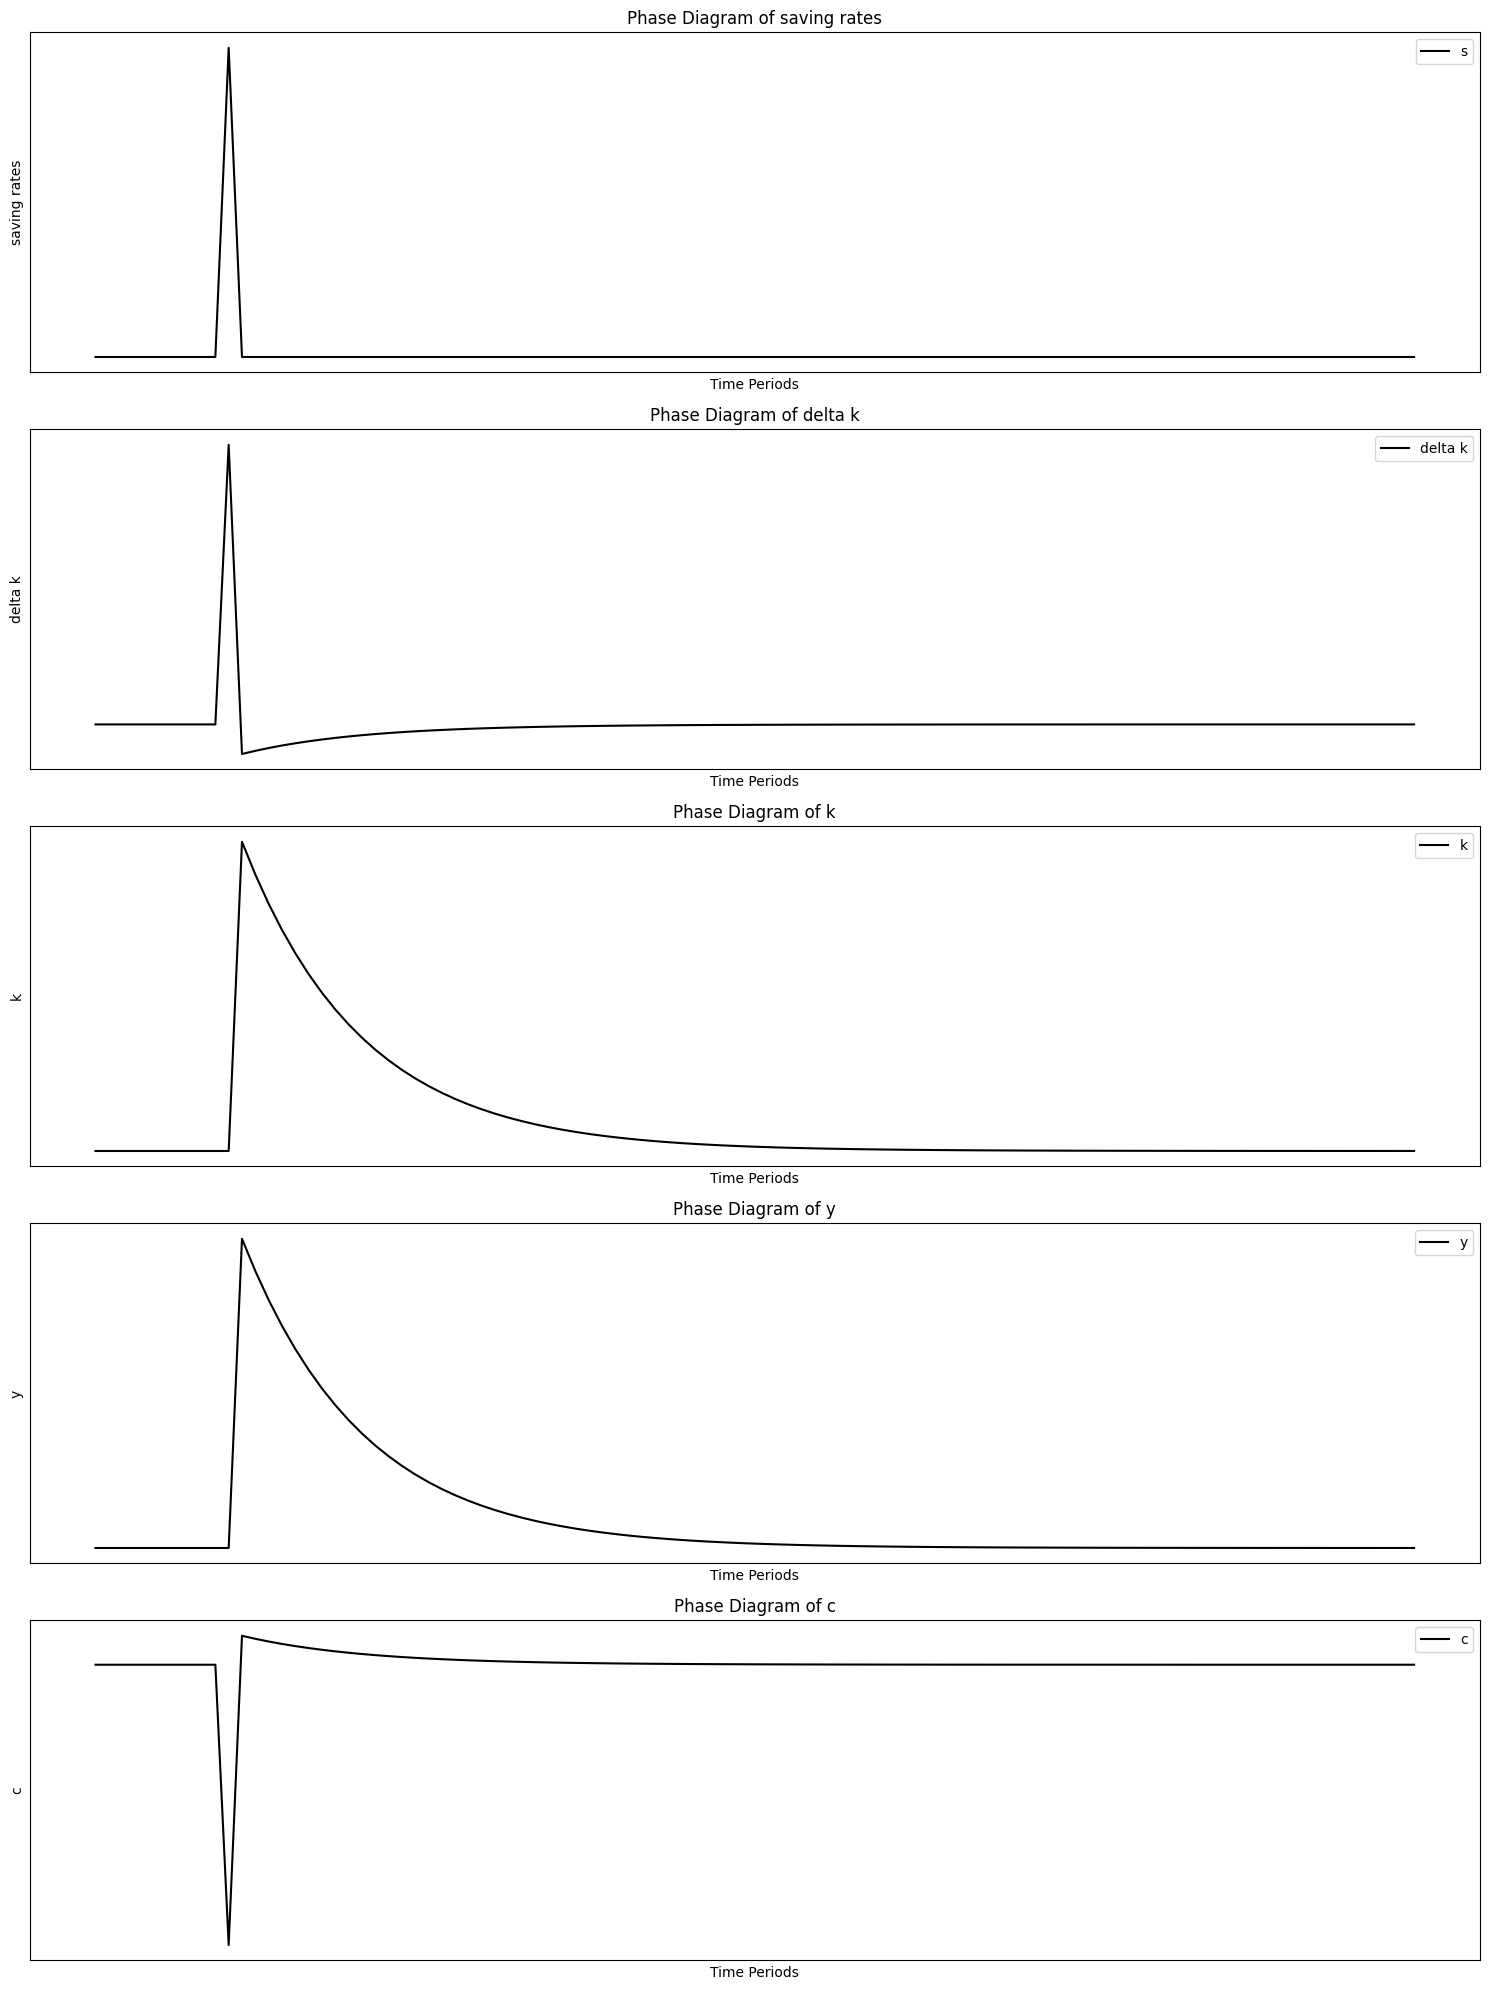

In [57]:
k_star = ((s) / (n + g + d)) ** (1 / (1 - alpha))
y_star = (k_star ** alpha)
i_star = s * y_star
c_star = y_star - i_star
d_star = (n + g + d) * k_star
delta_k = i_star - (n + g + d) * k_star

vector_of_k_star = np.zeros(time_periods)
vector_of_k_star[0] = k_star

vector_of_y_star = np.zeros(time_periods)
vector_of_y_star[0] = y_star

vector_of_i_star = np.zeros(time_periods)
vector_of_i_star[0] = i_star

vector_of_c_star = np.zeros(time_periods)
vector_of_c_star[0] = c_star

vector_of_delta_k = np.zeros(time_periods)
vector_of_delta_k[0] = delta_k


for value in range(time_periods):
    if value < time_periods - 1:
        vector_of_k_star[value + 1] = vector_of_k_star[value] + vector_of_i_star[value] - (n + g + d) * vector_of_k_star[value] #vector_of_i_star was used bcs i* = (n+d+g)k*
        vector_of_y_star[value + 1] = vector_of_k_star[value + 1] ** alpha
        vector_of_i_star[value + 1] = vector_of_s[value + 1] * vector_of_y_star[value + 1]
        vector_of_c_star[value + 1] = vector_of_y_star[value + 1] - vector_of_i_star[value + 1]
        vector_of_delta_k[value +1] = vector_of_i_star[value + 1] - (n + g + d) * vector_of_k_star[value + 1]

fig = plt.figure(figsize=(15, 20))

plt.subplot(5, 1, 1)
plt.plot(t, vector_of_s, label='s', color='black')
plt.xlabel('Time Periods')
plt.ylabel('saving rates')
plt.title('Phase Diagram of saving rates')
plt.legend()
plt.xticks([])
plt.yticks([])

plt.subplot(5, 1, 2)
plt.plot(t, vector_of_delta_k, label='delta k', color='black')
plt.xlabel('Time Periods')
plt.ylabel('delta k')
plt.title('Phase Diagram of delta k')
plt.legend()
plt.xticks([])
plt.yticks([])

plt.subplot(5, 1, 3)
plt.plot(t, vector_of_k_star, label='k', color='black')
plt.xlabel('Time Periods')
plt.ylabel('k')
plt.title('Phase Diagram of k')
plt.legend()
plt.xticks([])
plt.yticks([])

plt.subplot(5, 1, 4)
plt.plot(t, vector_of_y_star, label='y', color='black')
plt.xlabel('Time Periods')
plt.ylabel('y')
plt.title('Phase Diagram of y')
plt.legend()
plt.xticks([])
plt.yticks([])

plt.subplot(5, 1, 5)
plt.plot(t, vector_of_c_star, label='c', color='black')
plt.xlabel('Time Periods')
plt.ylabel('c')
plt.title('Phase Diagram of c')
plt.legend()
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

## A Permanent Increase In Saving Rates from 0.3 to 0.4 in the 10th period

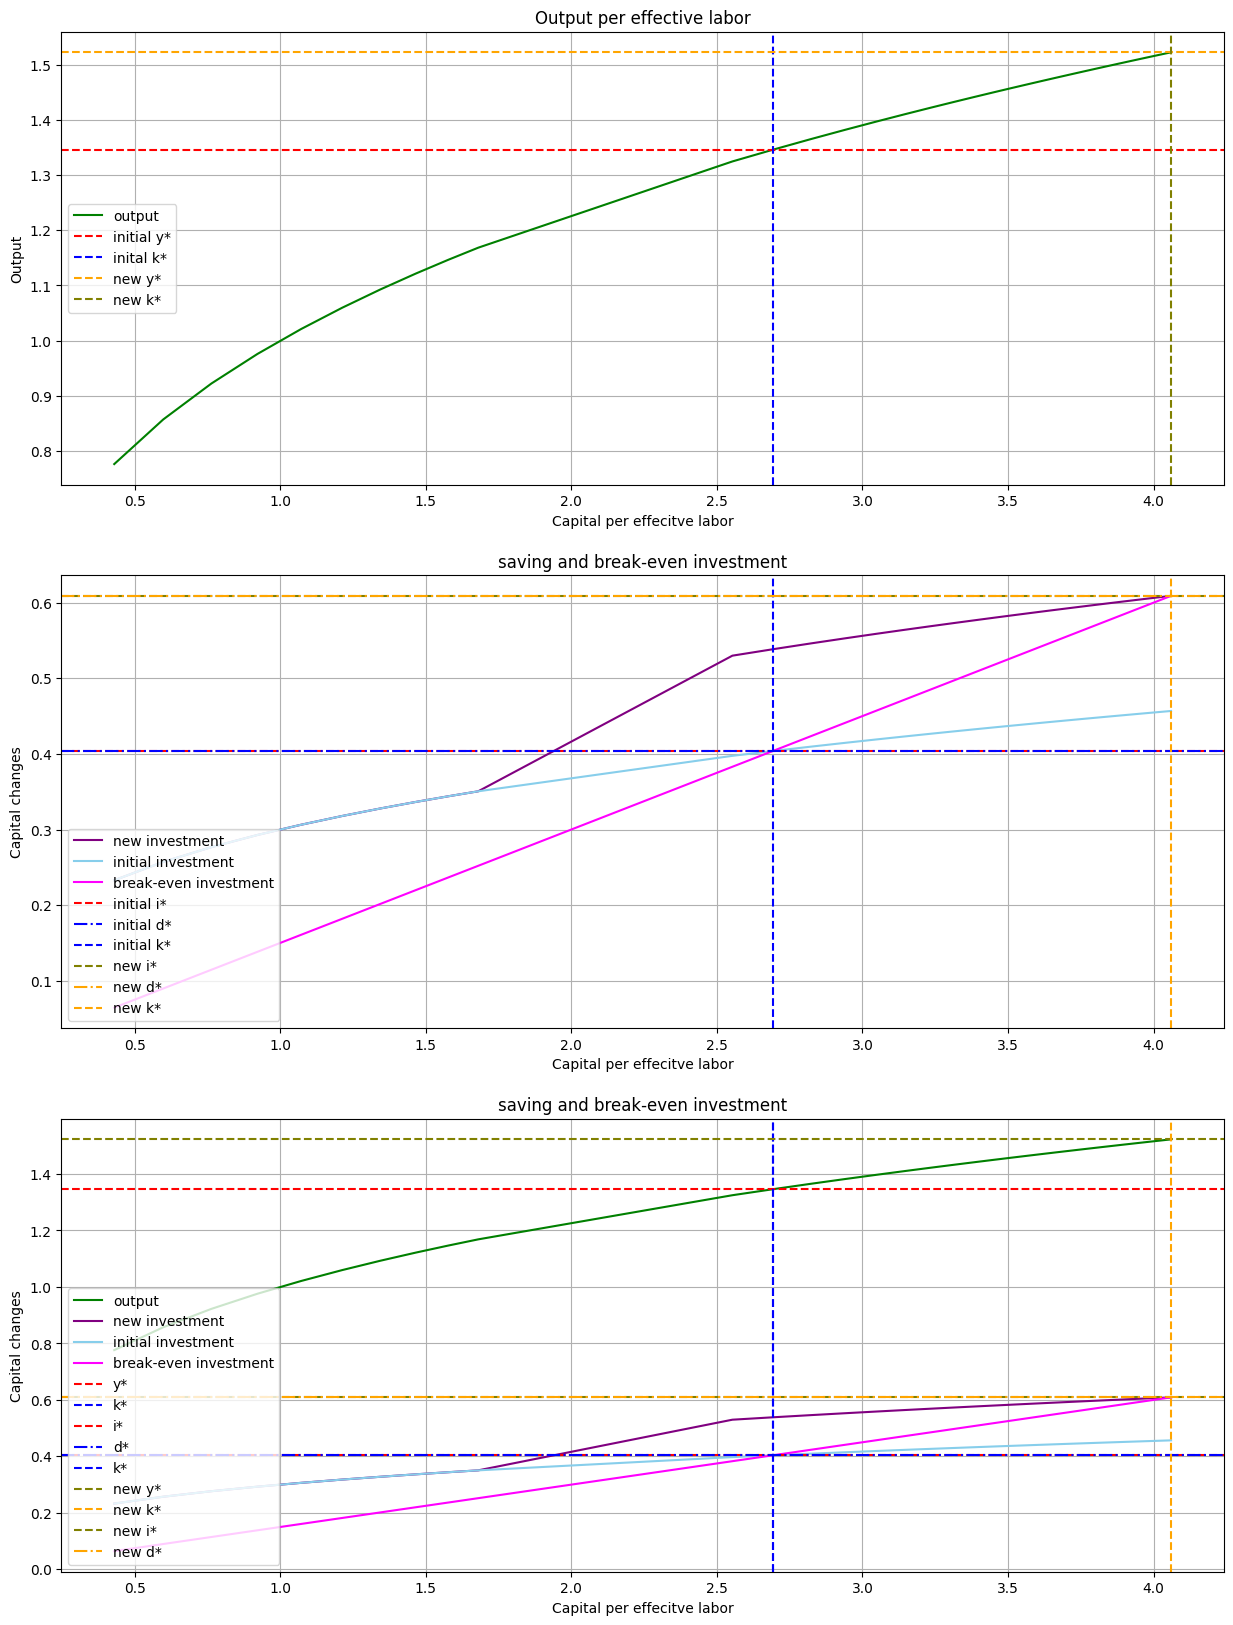

In [58]:
#parameters

s = 0.3 #saving rate
d = 0.1 #depreciation rate
n = 0.02 #population growth
g = 0.03 #grwoth rate of technology
alpha = 0.3

#Time Periods
time_periods = 100
t = np.arange(time_periods)

#capital, output, investment
k = np.zeros(time_periods)
k[0] = 0.43 #initial capital per effective labor

y = np.zeros(time_periods)
sfk1 = np.zeros(time_periods)
sfk2 = np.zeros(time_periods)

#saving rates over time
vector_of_s = np.zeros(time_periods)
vector_of_s[0:] = s
s_new = 0.4
period_of_shock = 10
vector_of_s[period_of_shock:] = s_new


for i in range(time_periods):
    k[i] = ((vector_of_s[i] / (n + g + d)) + (k[0] ** (1 - alpha) - vector_of_s[i] / (n + g + d)) * np.exp(-(1 - alpha) * (n + g + d) * t[i])) ** (1 / (1 - alpha))
    y[i] = k[i] ** alpha
    sfk1[i] = s * y[i]
    sfk2[i] = vector_of_s[i] * y[i]


k_star_new = ((s_new) / (n + g + d)) ** (1 / (1 - alpha))
y_star_new = (k_star_new ** alpha)
i_star_new = s_new * y_star_new
c_star_new = y_star_new - i_star_new
d_star_new = (n + g + d) * k_star_new
delta_k_new = i_star_new - (n + g + d) * k_star_new

fig = plt.figure(figsize=(15, 20))

plt.subplot(3, 1, 1)
plt.plot(k, y, color = "green", label = "output")
plt.axhline(y = y_star, color = 'r', linestyle = '--', label = 'initial y*')
plt.axvline(x = k_star, color = 'b', linestyle = '--', label = 'inital k*')
plt.axhline(y = y_star_new, color = 'orange', linestyle = '--', label = 'new y*')
plt.axvline(x = k_star_new, color = 'olive', linestyle = '--', label = 'new k*')
plt.title("Output per effective labor")
plt.xlabel("Capital per effecitve labor")
plt.ylabel("Output")
plt.legend()
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(k, sfk2, color = "purple", label = "new investment")
plt.plot(k, sfk1, color = "skyblue", label = "initial investment")
plt.plot(k, (n + g + d) * k, color = "magenta", label = "break-even investment")
plt.axhline(y = i_star, color = 'r', linestyle = '--', label = 'initial i*')
plt.axhline(y = d_star, color = 'b', linestyle = '-.', label = 'initial d*')
plt.axvline(x = k_star, color = 'b', linestyle = '--', label = 'initial k*')
plt.axhline(y = i_star_new, color = 'olive', linestyle = '--', label = 'new i*')
plt.axhline(y = d_star_new, color = 'orange', linestyle = '-.', label = 'new d*')
plt.axvline(x = k_star_new, color = 'orange', linestyle = '--', label = 'new k*')
plt.title("saving and break-even investment")
plt.xlabel("Capital per effecitve labor")
plt.ylabel("Capital changes")
plt.legend(loc = 3)
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(k, y, color = "green", label = "output")
plt.plot(k, sfk2, color = "purple", label = "new investment")
plt.plot(k, sfk1, color = "skyblue", label = "initial investment")
plt.plot(k, (n + g + d) * k, color = "magenta", label = "break-even investment")
plt.axhline(y = y_star, color = 'r', linestyle = '--', label = 'y*')
plt.axvline(x = k_star, color = 'b', linestyle = '--', label = 'k*')
plt.axhline(y = i_star, color = 'r', linestyle = '--', label = 'i*')
plt.axhline(y = d_star, color = 'b', linestyle = '-.', label = 'd*')
plt.axvline(x = k_star, color = 'b', linestyle = '--', label = 'k*')
plt.axhline(y = y_star_new, color = 'olive', linestyle = '--', label = 'new y*')
plt.axvline(x = k_star_new, color = 'orange', linestyle = '--', label = 'new k*')
plt.axhline(y = i_star_new, color = 'olive', linestyle = '--', label = 'new i*')
plt.axhline(y = d_star_new, color = 'orange', linestyle = '-.', label = 'new d*')
plt.title("saving and break-even investment")
plt.xlabel("Capital per effecitve labor")
plt.ylabel("Capital changes")
plt.legend(loc = 3)
plt.grid()

plt.show()


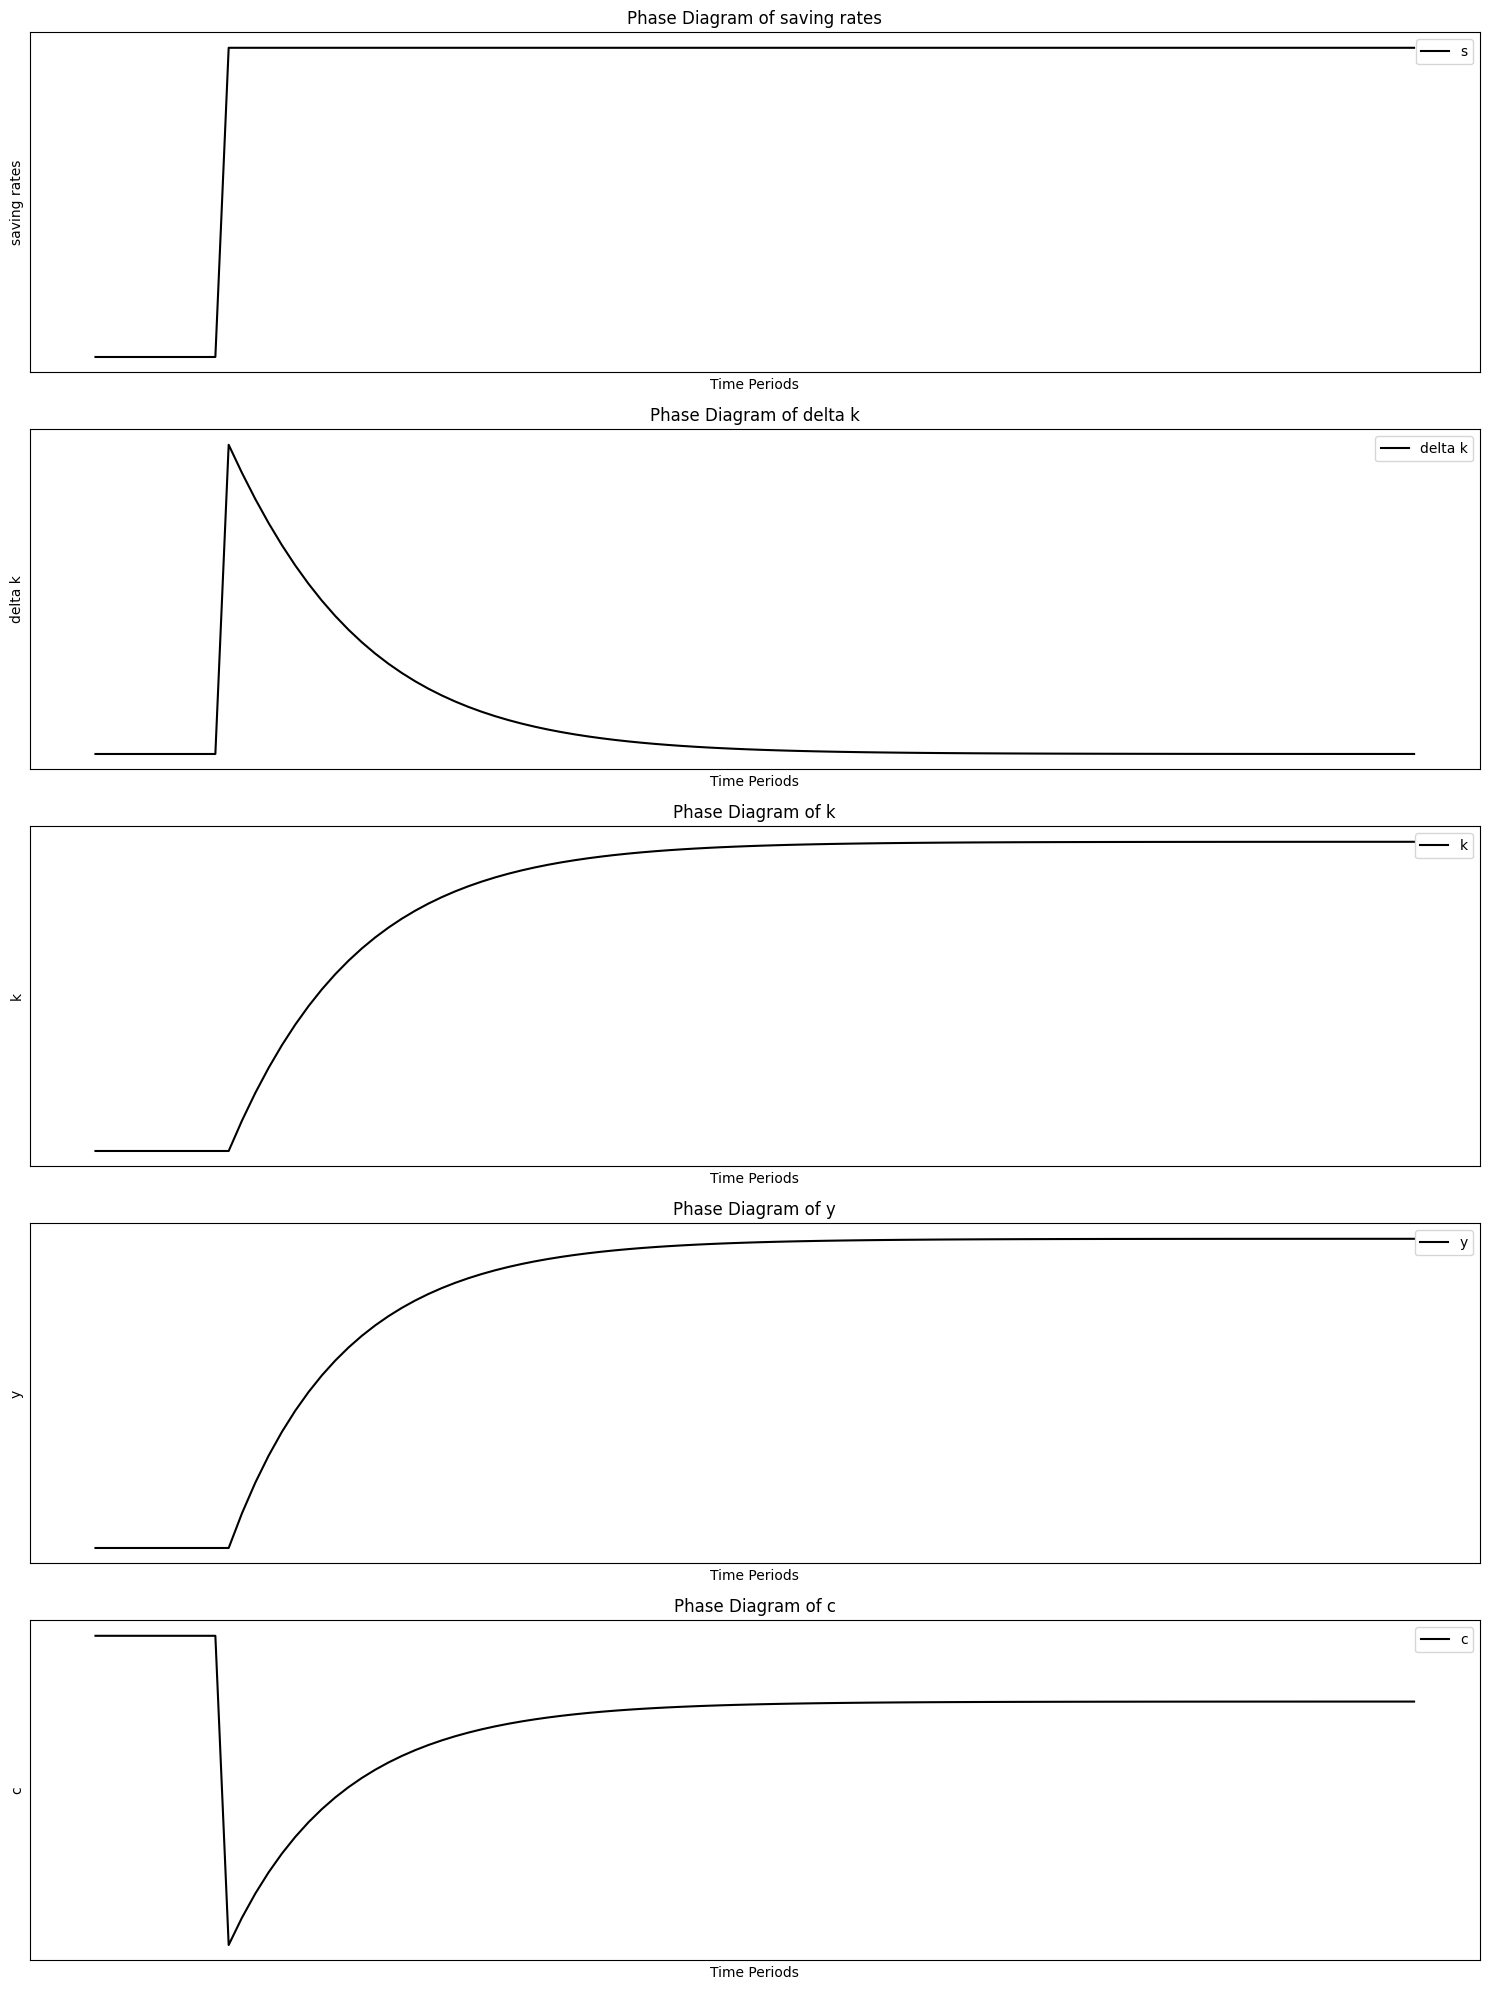

In [62]:
k_star = ((s) / (n + g + d)) ** (1 / (1 - alpha))
y_star = (k_star ** alpha)
i_star = s * y_star
c_star = y_star - i_star
d_star = (n + g + d) * k_star
delta_k = i_star - (n + g + d) * k_star

vector_of_k_star = np.zeros(time_periods)
vector_of_k_star[0] = k_star

vector_of_y_star = np.zeros(time_periods)
vector_of_y_star[0] = y_star

vector_of_i_star = np.zeros(time_periods)
vector_of_i_star[0] = i_star

vector_of_c_star = np.zeros(time_periods)
vector_of_c_star[0] = c_star

vector_of_delta_k = np.zeros(time_periods)
vector_of_delta_k[0] = delta_k

for value in range(time_periods):
    if value < time_periods - 1:
        vector_of_k_star[value + 1] = vector_of_k_star[value] + vector_of_i_star[value] - (n + g + d) * vector_of_k_star[value] #vector_of_i_star was used bcs i* = (n+d+g)k*
        vector_of_y_star[value + 1] = vector_of_k_star[value + 1] ** alpha
        vector_of_i_star[value + 1] = vector_of_s[value + 1] * vector_of_y_star[value + 1]
        vector_of_c_star[value + 1] = vector_of_y_star[value + 1] - vector_of_i_star[value + 1]
        vector_of_delta_k[value +1] = vector_of_i_star[value + 1] - (n + g + d) * vector_of_k_star[value + 1]

fig = plt.figure(figsize=(15, 20))

plt.subplot(5, 1, 1)
plt.plot(t, vector_of_s, label='s', color='black')
plt.xlabel('Time Periods')
plt.ylabel('saving rates')
plt.title('Phase Diagram of saving rates')
plt.legend()
plt.xticks([])
plt.yticks([])

plt.subplot(5, 1, 2)
plt.plot(t, vector_of_delta_k, label='delta k', color='black')
plt.xlabel('Time Periods')
plt.ylabel('delta k')
plt.title('Phase Diagram of delta k')
plt.legend()
plt.xticks([])
plt.yticks([])

plt.subplot(5, 1, 3)
plt.plot(t, vector_of_k_star, label='k', color='black')
plt.xlabel('Time Periods')
plt.ylabel('k')
plt.title('Phase Diagram of k')
plt.legend()
plt.xticks([])
plt.yticks([])

plt.subplot(5, 1, 4)
plt.plot(t, vector_of_y_star, label='y', color='black')
plt.xlabel('Time Periods')
plt.ylabel('y')
plt.title('Phase Diagram of y')
plt.legend()
plt.xticks([])
plt.yticks([])

plt.subplot(5, 1, 5)
plt.plot(t, vector_of_c_star, label='c', color='black')
plt.xlabel('Time Periods')
plt.ylabel('c')
plt.title('Phase Diagram of c')
plt.legend()
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

## TFP Shocks
**defined as $A(1 + g)$** 

note: based on Solow's paper and Romer's book it must follow exponential growth. I am considering this form for sake of simplicity.

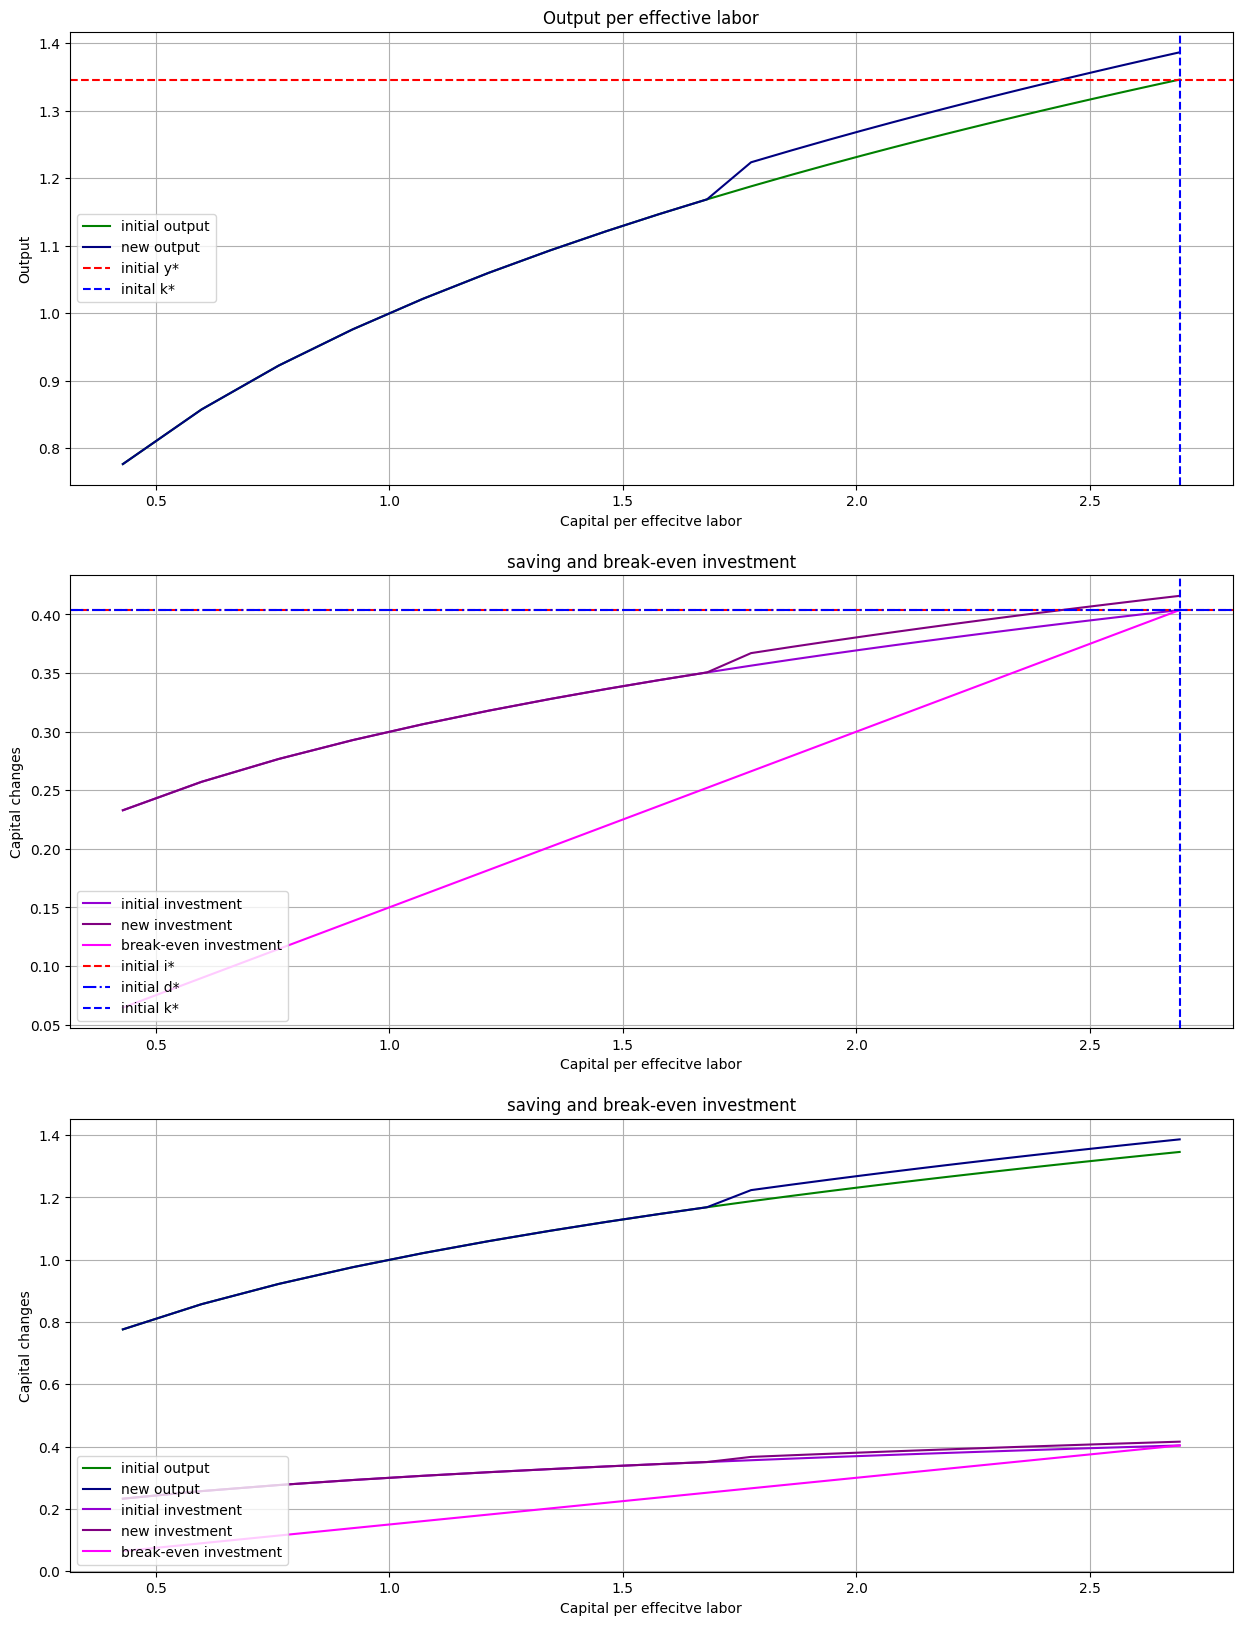

In [63]:
#parameters

s = 0.3 #saving rate
d = 0.1 #depreciation rate
n = 0.02 #population growth
g = 0.03 #grwoth rate of technology
A = 1 #Knowledge
alpha = 0.3

#Time Periods
time_periods = 100
t = np.arange(time_periods)

#capital, output, investment
k = np.zeros(time_periods)
k[0] = 0.43 #initial capital per effective labor

y1 = np.zeros(time_periods)
y2 = np.zeros(time_periods)
sfk1 = np.zeros(time_periods)
sfk2 = np.zeros(time_periods)

TFP = np.zeros(time_periods)
TFP[0:] = A
period_of_shock = 10

for i in range(time_periods):
    k[i] = ((s / (n + g + d)) + (k[0] ** (1 - alpha) - s / (n + g + d)) * np.exp(-(1 - alpha) * (n + g + d) * t[i])) ** (1 / (1 - alpha))
    y1[i] = A * k[i] ** alpha
    y2[i] = TFP[i] * k[i] ** alpha
    TFP[period_of_shock:] = A * (1 + g)
    sfk1[i] = s * y1[i]
    sfk2[i] = s * y2[i]

fig = plt.figure(figsize=(15, 20))

plt.subplot(3, 1, 1)
plt.plot(k, y1, color = "green", label = "initial output")
plt.plot(k, y2, color = "navy", label = "new output")
plt.axhline(y = y_star, color = 'r', linestyle = '--', label = 'initial y*')
plt.axvline(x = k_star, color = 'b', linestyle = '--', label = 'inital k*')
plt.title("Output per effective labor")
plt.xlabel("Capital per effecitve labor")
plt.ylabel("Output")
plt.legend()
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(k, sfk1, color = "darkviolet", label = "initial investment")
plt.plot(k, sfk2, color = "purple", label = "new investment")
plt.plot(k, (n + g + d) * k, color = "magenta", label = "break-even investment")
plt.axhline(y = i_star, color = 'r', linestyle = '--', label = 'initial i*')
plt.axhline(y = d_star, color = 'b', linestyle = '-.', label = 'initial d*')
plt.axvline(x = k_star, color = 'b', linestyle = '--', label = 'initial k*')
plt.title("saving and break-even investment")
plt.xlabel("Capital per effecitve labor")
plt.ylabel("Capital changes")
plt.legend(loc = 3)
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(k, y1, color = "green", label = "initial output")
plt.plot(k, y2, color = "navy", label = "new output")
plt.plot(k, sfk1, color = "darkviolet", label = "initial investment")
plt.plot(k, sfk2, color = "purple", label = "new investment")
plt.plot(k, (n + g + d) * k, color = "magenta", label = "break-even investment")
plt.title("saving and break-even investment")
plt.xlabel("Capital per effecitve labor")
plt.ylabel("Capital changes")
plt.legend(loc = 3)
plt.grid()

plt.show()


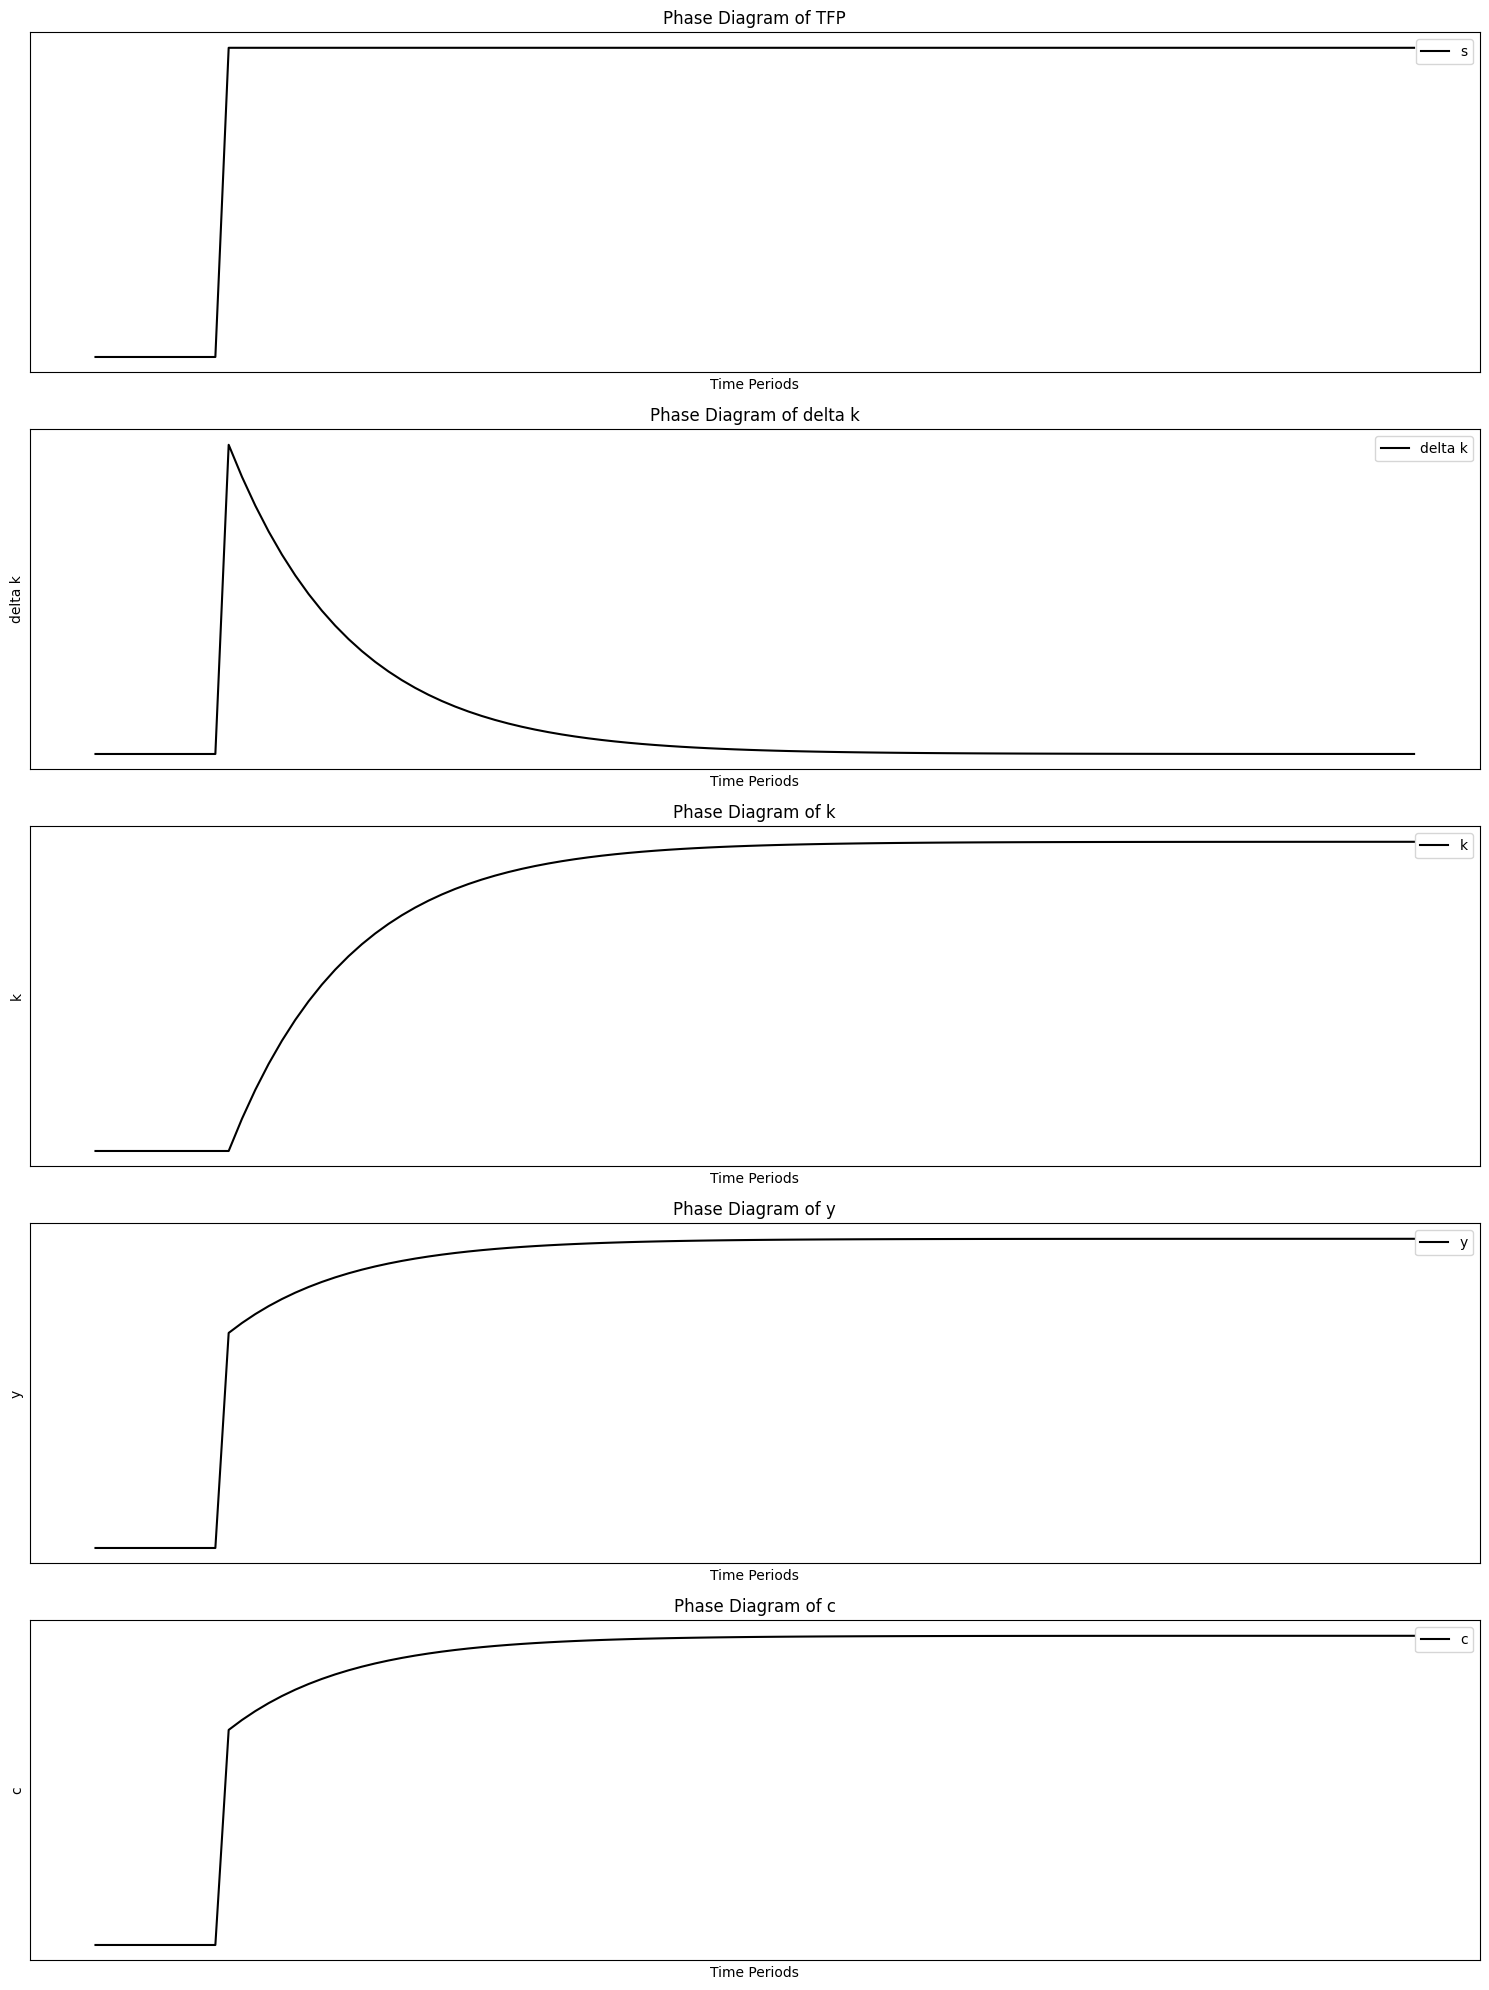

In [64]:
k_star = ((s) / (n + g + d)) ** (1 / (1 - alpha))
y_star = (k_star ** alpha)
i_star = s * y_star
c_star = y_star - i_star
d_star = (n + g + d) * k_star
delta_k = i_star - (n + g + d) * k_star

vector_of_k_star = np.zeros(time_periods)
vector_of_k_star[0] = k_star

vector_of_y_star = np.zeros(time_periods)
vector_of_y_star[0] = y_star

vector_of_i_star = np.zeros(time_periods)
vector_of_i_star[0] = i_star

vector_of_c_star = np.zeros(time_periods)
vector_of_c_star[0] = c_star

vec_of_s = np.zeros(time_periods)
vec_of_s[0:] = s

for value in range(time_periods):
    if value < time_periods - 1:
        vector_of_k_star[value + 1] = vector_of_k_star[value] + vector_of_i_star[value] - (n + g + d) * vector_of_k_star[value] #vector_of_i_star was used bcs i* = (n+d+g)k*
        vector_of_y_star[value + 1] = TFP[value + 1] * vector_of_k_star[value + 1] ** alpha
        vector_of_i_star[value + 1] = vec_of_s[value + 1] * vector_of_y_star[value + 1]
        vector_of_c_star[value + 1] = vector_of_y_star[value + 1] - vector_of_i_star[value + 1]
        vector_of_delta_k[value + 1] = vector_of_i_star[value + 1] - (n + g + d) * vector_of_k_star[value + 1]

fig = plt.figure(figsize=(15, 20))

plt.subplot(5, 1, 1)
plt.plot(t, TFP, label='s', color='black')
plt.xlabel('Time Periods')
plt.title('Phase Diagram of TFP')
plt.legend()
plt.xticks([])
plt.yticks([])

plt.subplot(5, 1, 2)
plt.plot(t, vector_of_delta_k, label='delta k', color='black')
plt.xlabel('Time Periods')
plt.ylabel('delta k')
plt.title('Phase Diagram of delta k')
plt.legend()
plt.xticks([])
plt.yticks([])

plt.subplot(5, 1, 3)
plt.plot(t, vector_of_k_star, label='k', color='black')
plt.xlabel('Time Periods')
plt.ylabel('k')
plt.title('Phase Diagram of k')
plt.legend()
plt.xticks([])
plt.yticks([])

plt.subplot(5, 1, 4)
plt.plot(t, vector_of_y_star, label='y', color='black')
plt.xlabel('Time Periods')
plt.ylabel('y')
plt.title('Phase Diagram of y')
plt.legend()
plt.xticks([])
plt.yticks([])

plt.subplot(5, 1, 5)
plt.plot(t, vector_of_c_star, label='c', color='black')
plt.xlabel('Time Periods')
plt.ylabel('c')
plt.title('Phase Diagram of c')
plt.legend()
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()